# Concerns:

- Stop wrods not in

In [1]:
### Packages ###
import nltk
import pandas as pd
from utils import *
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import STOPWORDS

[nltk_data] Downloading package punkt to /Users/simondn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/simondn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/simondn/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Input

In [2]:
### Number of Topics ###
NumTopics = 5

### Display ###
pd.set_option('display.max_colwidth', None)  # Show full column width
pd.set_option('display.width', None)         # Auto-detect terminal width



# Topic Modelling

In [3]:
### Get Documents ###
Vatican1Documents = ChooseCouncilFunction('I', 'la')
Vatican2Documents = ChooseCouncilFunction('II', 'lt')

In [4]:
### Text DataFrame ###
TextDataFrame_1 = pd.DataFrame({
    "Text": [
        Vatican1Documents[0]["Text"],
        Vatican1Documents[1]["Text"]]})

TextDataFrame_2 = pd.DataFrame({
    "Text": [
        Vatican2Documents[0]["Text"],
        Vatican2Documents[1]["Text"],
        Vatican2Documents[2]["Text"],
        Vatican2Documents[3]["Text"],
        Vatican2Documents[4]["Text"],
        Vatican2Documents[5]["Text"],
        Vatican2Documents[6]["Text"],
        Vatican2Documents[7]["Text"],
        Vatican2Documents[8]["Text"],
        Vatican2Documents[9]["Text"],
        Vatican2Documents[10]["Text"],
        Vatican2Documents[11]["Text"],
        Vatican2Documents[12]["Text"],
        Vatican2Documents[13]["Text"],
        Vatican2Documents[14]["Text"],
        Vatican2Documents[15]["Text"]
        ]})

In [8]:
### Stop Words ###
nltk.download('stopwords')
nltk.download('punkt')
NLTKStopWords = set(stopwords.words('italian')).union(STOPWORDS)  # Combine both


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/simondn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/simondn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
### Topic Modelling ###
Results_Vatican1 = TopicModellingFunction(TextDataFrame_1, NumTopics, NLTKStopWords)
Results_Vatican2 = TopicModellingFunction(TextDataFrame_2, NumTopics, NLTKStopWords)
TopTerms_Vatican1 = Results_Vatican1["df_output"]["TopTerms"]
TopTerms_Vatican2 = Results_Vatican2["df_output"]["TopTerms"]

In [7]:
print(TopTerms_Vatican1)
print(TopTerms_Vatican2)

0        ecclesia, anathema, ecclesiae, dixerit, fidei, fidem, sanctum, autem, atque, etiam
1           ecclesiae, ecclesiam, fidei, petro, super, omnes, christi, domino, atque, autem
2    fidei, ecclesiae, anathema, ecclesia, dixerit, autem, fidem, ecclesiam, etiam, omnibus
3        fidei, ecclesia, anathema, fidem, dixerit, ecclesiae, atque, posse, etiam, sanctum
4      fidei, ecclesiae, ecclesia, ecclesiam, anathema, atque, domino, fidem, super, omnium
Name: TopTerms, dtype: object
0    cardinalis, titulo, presbyter, atque, etiam, archiepiscopus, ecclesiae, ecclesia, praesertim, autem
1          ecclesiae, cardinalis, christi, apostolatus, ecclesia, vitae, presbyter, titulo, etiam, omnes
2                   ecclesia, ecclesiae, christi, autem, omnes, etiam, christo, atque, cardinalis, inter
3                          atque, inter, autem, etiam, ecclesia, humanae, vitae, omnes, homines, hominis
4    cardinalis, presbyter, titulo, archiepiscopus, atque, ecclesiae, autem, christi, homi

# Word Frequency

In [8]:
### Combine all documents ###
Vatican1FullText = " ".join([doc["Text"] for doc in Vatican1Documents])
Vatican2FullText = " ".join([doc["Text"] for doc in Vatican2Documents])


In [1]:
### Word Frequency ###
Vatican1WordFreq = WordFrequencyAnalysis(Vatican1FullText, TopN=20)
Vatican2WordFreq = WordFrequencyAnalysis(Vatican2FullText, TopN=20)


NameError: name 'WordFrequencyAnalysis' is not defined

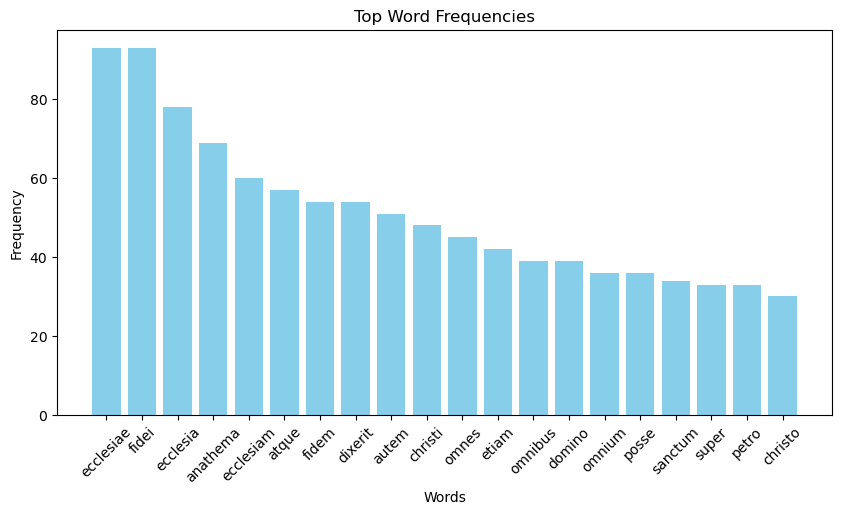

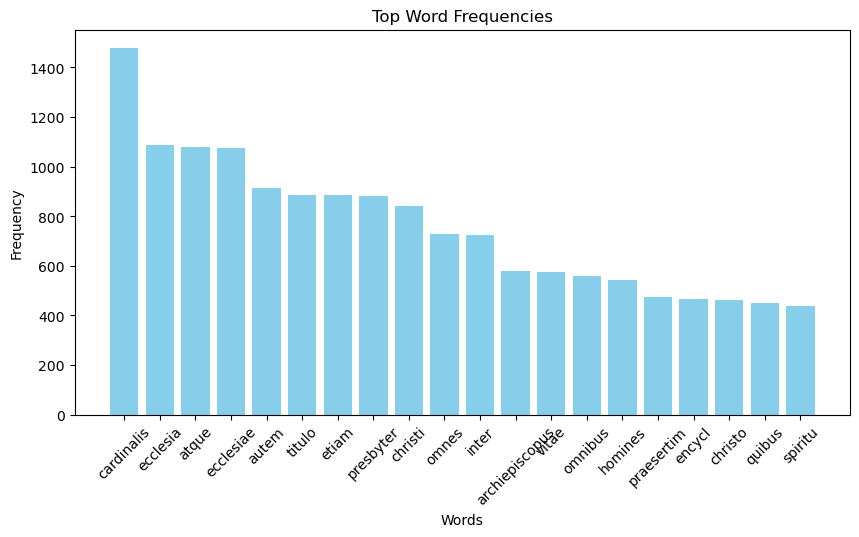

In [10]:
plt.figure(figsize=(10, 5))
plt.bar(Vatican1WordFreq['Word'], Vatican1WordFreq['Frequency'], color='skyblue')
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top Word Frequencies")
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(Vatican2WordFreq['Word'], Vatican2WordFreq['Frequency'], color='skyblue')
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top Word Frequencies")
plt.show()



In [20]:
def CompareWordFrequencies(DataFrame1, DataFrame2):

    MergedDataFrame = pd.merge(DataFrame1, DataFrame2, on="Word", how="outer", suffixes=("DataFrame1", "DataFrame2"))                        # Merge DataFrames
    MergedDataFrame["Ratio_DataFrame2/DataFrame1"] = MergedDataFrame["FrequencyDataFrame2"] / (MergedDataFrame["FrequencyDataFrame1"] + 1) # Ratio
    MergedDataFrame = MergedDataFrame.sort_values(by="Ratio_DataFrame2/DataFrame1", ascending=False)                                         # Sot by Ratio

    return MergedDataFrame


In [21]:
# Compare Vatican I vs. Vatican II
ComparisonTable = CompareWordFrequencies(DataFrame1 = Vatican1WordFreq, DataFrame2 = Vatican2WordFreq)

# Display the first 15 rows
print(ComparisonTable.head(15))


         Word  FrequencyDataFrame1  FrequencyDataFrame2  \
11      etiam                 42.0                884.0   
5       atque                 57.0               1078.0   
8       autem                 51.0                914.0   
9     christi                 48.0                840.0   
10      omnes                 45.0                728.0   
19    christo                 30.0                463.0   
12    omnibus                 39.0                559.0   
2    ecclesia                 78.0               1088.0   
0   ecclesiae                 93.0               1077.0   
1       fidei                 93.0                  NaN   
3    anathema                 69.0                  NaN   
4   ecclesiam                 60.0                  NaN   
6       fidem                 54.0                  NaN   
7     dixerit                 54.0                  NaN   
13     domino                 39.0                  NaN   

    Ratio_DataFrame2/DataFrame1  
11                   